<a href="https://colab.research.google.com/github/mawonuga121/ohtobeascholar/blob/main/Awonuga_DSC4900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maintainance

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn import linear_model

# Imported Datasets

In [ ]:
ready_grad= pd.read_csv('https://raw.githubusercontent.com/mawonuga121/ohtobeascholar/main/newtnreadygraduate.csv')
ready_grad

,year,system_name,school_name,subgroup,n_count,n_ready_grad,pct_ready_grad
0,2018,Davidson County,MNPS Virtual School,All Students,26,13,50
1,2018,Davidson County,MNPS Virtual School,Asian,1,*,*
2,2018,Davidson County,MNPS Virtual School,Black or African American,2,*,*
3,2018,Davidson County,MNPS Virtual School,Black/Hispanic/Native American,4,*,*
4,2018,Davidson County,MNPS Virtual School,Economically Disadvantaged,4,*,*
...,...,...,...,...,...,...,...
1593,2021,Davidson County,RePublic High School,Non-English Learners,93,30,32.3
1594,2021,Davidson County,RePublic High School,Non-Students with Disabilities,85,26,30.6
1595,2021,Davidson County,RePublic High School,Students with Disabilities,19,5,26.3
1596,2021,Davidson County,RePublic High School,Super Subgroup,101,30,29.7


In [ ]:
act_score=pd.read_csv('https://raw.githubusercontent.com/mawonuga121/ohtobeascholar/main/act_scores.csv')
act_score

,year,District Name,School Name,Subgroup,Valid Tests,Participation Rate,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score,Number Scoring 21 or Higher,Percent Scoring 21 or Higher,Number Scoring Below 19,Percent Scoring Below 19
0,2018.0,Davidson County,MNPS Virtual School,All Students,12.0,86,19.6,18.6,22,20.1,20.2,7,58.3,5,41.7
1,2018.0,Davidson County,MNPS Virtual School,Black/Hispanic/Native American,3.0,*,*,*,*,*,*,*,*,*,*
2,2018.0,Davidson County,MNPS Virtual School,Economically Disadvantaged,4.0,*,*,*,*,*,*,*,*,*,*
3,2018.0,Davidson County,Antioch High School,All Students,351.0,97,16.1,16.7,17.4,17,17,59,16.8,242,68.9
4,2018.0,Davidson County,Antioch High School,Black/Hispanic/Native American,236.0,96,15.6,16.2,16.8,16.5,16.4,28,11.9,175,74.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2021.0,Davidson County,RePublic High School,All Students,146.0,99,15.2,16.1,17.2,17.1,16.6,25,17.1,105,71.9
564,2021.0,Davidson County,RePublic High School,Black/Hispanic/Native American,131.0,99,14.5,15.8,16.7,16.7,16.1,19,14.5,97,74
565,2021.0,Davidson County,RePublic High School,Economically Disadvantaged,84.0,99,14.2,15.8,16.5,16.6,15.9,11,13.1,63,75
566,2021.0,Davidson County,RePublic High School,English Learners,19.0,100,10.6,14.6,13.4,13.6,13.2,**,**,**,**


In [ ]:
chronic_absent=pd.read_csv('https://raw.githubusercontent.com/mawonuga121/ohtobeascholar/main/chronic_absenteeism.csv')
chronic_absent

,year,school_system,school_name,student_group,n_students,n_chronically_absent,pct_chronically_absent
0,2018,Davidson County,MNPS Virtual School,All Students,92,18,19.6
1,2018,Davidson County,MNPS Virtual School,American Indian or Alaska Native,1,*,*
2,2018,Davidson County,MNPS Virtual School,Asian,3,*,*
3,2018,Davidson County,MNPS Virtual School,Black or African American,18,4,22.2
4,2018,Davidson County,MNPS Virtual School,Black/Hispanic/Native American,24,5,20.8
...,...,...,...,...,...,...,...
866,2021,Davidson County,The Academy at Hickory Hollow,Economically Disadvantaged,9,*,*
867,2021,Davidson County,The Academy at Hickory Hollow,English Learners with Transitional 1-4,6,*,*
868,2021,Davidson County,The Academy at Hickory Hollow,Hispanic,9,*,*
869,2021,Davidson County,The Academy at Hickory Hollow,Students with Disabilities,1,*,*


In [ ]:
cgr=pd.read_csv('https://raw.githubusercontent.com/mawonuga121/ohtobeascholar/main/college%20going%20rate.csv')
cgr

,year,system_name,school_name,subgroup,cgr
0,2018,Davidson County,Glencliff High School,All Students,41.7
1,2018,Davidson County,Hunters Lane High School,All Students,37.9
2,2018,Davidson County,Middle College High School,All Students,81.1
3,2018,Davidson County,Maplewood High School,All Students,35.4
4,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,80.0
5,2018,Davidson County,STEM Prep High School,All Students,0.0
6,2018,Davidson County,RePublic High School,All Students,0.0
7,2019,Davidson County,Glencliff High School,All Students,39.0
8,2019,Davidson County,Hunters Lane High School,All Students,38.0
9,2019,Davidson County,Middle College High School,All Students,78.0


In [ ]:
predictive= pd.read_csv('https://raw.githubusercontent.com/mawonuga121/ohtobeascholar/main/predictive_model.csv')
predictive

,year,system_name,school_name,subgroup,cgr,num_21,num_readygrad,num_chronic,espos
0,2021,Davidson County,Hunters Lane High School,All Students,28,19,48,648,27
1,2021,Davidson County,Early College High School,All Students,78,39,41,34,7
2,2021,Davidson County,RePublic High School,All Students,46,25,31,387,10
3,2021,Davidson County,KIPP Nashville Colleigate High School,All Students,53,23,61,126,12




# Filtered Datasets

In [ ]:
new_readygrad=ready_grad.loc[ready_grad['school_name'].isin(["KIPP Nashville Collegiate High School", "Maplewood High", "RePublic High School", "Hunters Lane High", "STEM Prep High School", "Glencliff High School", "Middle College High", "Early College High School"])]
new_readygrad

,year,system_name,school_name,subgroup,n_count,n_ready_grad,pct_ready_grad
63,2018,Davidson County,Glencliff High School,All Students,396,62,15.7
64,2018,Davidson County,Glencliff High School,American Indian or Alaska Native,1,*,*
65,2018,Davidson County,Glencliff High School,Asian,23,9,39.1
66,2018,Davidson County,Glencliff High School,Black or African American,72,8,11.1
67,2018,Davidson County,Glencliff High School,Black/Hispanic/Native American,285,35,12.3
...,...,...,...,...,...,...,...
1593,2021,Davidson County,RePublic High School,Non-English Learners,93,30,32.3
1594,2021,Davidson County,RePublic High School,Non-Students with Disabilities,85,26,30.6
1595,2021,Davidson County,RePublic High School,Students with Disabilities,19,5,26.3
1596,2021,Davidson County,RePublic High School,Super Subgroup,101,30,29.7


In [ ]:
new_actscore=act_score.loc[act_score['School Name'].isin(["KIPP Nashville Collegiate High School", "Maplewood High", "RePublic High School", "Hunters Lane High", "STEM Prep High School", "Glencliff High School", "Early College High School", "Middle College High"])]
new_actscore['year'] = new_actscore['year'].astype('int')
new_actscore

<ipython-input-8-b0c4266837ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_actscore['year'] = new_actscore['year'].astype('int')


,year,District Name,School Name,Subgroup,Valid Tests,Participation Rate,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score,Number Scoring 21 or Higher,Percent Scoring 21 or Higher,Number Scoring Below 19,Percent Scoring Below 19
21,2018,Davidson County,Glencliff High School,All Students,228.0,99,14.5,16.2,16.1,16.3,15.9,24,10.5,191,83.8
22,2018,Davidson County,Glencliff High School,Black/Hispanic/Native American,167.0,99,14.1,16,15.6,16,15.6,15,9,147,88
23,2018,Davidson County,Glencliff High School,Economically Disadvantaged,175.0,100,14.4,16.1,16,16.1,15.8,16,9.1,150,85.7
24,2018,Davidson County,Glencliff High School,English Learners,63.0,100,12.5,15.6,14.1,15.1,14.4,**,**,**,**
25,2018,Davidson County,Glencliff High School,Students with Disabilities,16.0,100,11.1,14.2,13.4,15,13.6,**,**,**,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2021,Davidson County,RePublic High School,All Students,146.0,99,15.2,16.1,17.2,17.1,16.6,25,17.1,105,71.9
564,2021,Davidson County,RePublic High School,Black/Hispanic/Native American,131.0,99,14.5,15.8,16.7,16.7,16.1,19,14.5,97,74
565,2021,Davidson County,RePublic High School,Economically Disadvantaged,84.0,99,14.2,15.8,16.5,16.6,15.9,11,13.1,63,75
566,2021,Davidson County,RePublic High School,English Learners,19.0,100,10.6,14.6,13.4,13.6,13.2,**,**,**,**


In [ ]:
new_chronicabsent=chronic_absent.loc[chronic_absent['school_name'].isin(["KIPP Nashville Collegiate High School", "Maplewood High", "RePublic High School", "Hunters Lane High", "STEM Prep High School", "Glencliff High School", "Knowledge Academy", "Cane Ridge High", "Middle College High", "Early College High School"])]
new_chronicabsent

,year,school_system,school_name,student_group,n_students,n_chronically_absent,pct_chronically_absent
50,2018,Davidson County,Glencliff High School,All Students,1144,386,33.7
51,2018,Davidson County,Glencliff High School,Asian,63,14,22.2
52,2018,Davidson County,Glencliff High School,Black or African American,231,72,31.2
53,2018,Davidson County,Glencliff High School,Black/Hispanic/Native American,807,262,32.5
54,2018,Davidson County,Glencliff High School,Economically Disadvantaged,403,157,39
...,...,...,...,...,...,...,...
842,2021,Davidson County,RePublic High School,Economically Disadvantaged,206,153,74.3
843,2021,Davidson County,RePublic High School,English Learners with Transitional 1-4,128,79,61.7
844,2021,Davidson County,RePublic High School,Hispanic,289,150,51.9
845,2021,Davidson County,RePublic High School,Students with Disabilities,108,70,64.8


In [ ]:
epsos= {'School Name': ["KIPP Nashville Collegiate High School", "Maplewood High", "RePublic High School", "Hunters Lane High", "STEM Prep High School", "Glencliff High", "Middle/Early College High School"],
        'Total EPSOs': [12, 21, 10, 27, 18, 27, 7 ]}
epsos_df= pd.DataFrame(epsos)
epsos_df

,School Name,Total EPSOs
0,KIPP Nashville Collegiate High School,12
1,Maplewood High,21
2,RePublic High School,10
3,Hunters Lane High,27
4,STEM Prep High School,18
5,Glencliff High,27
6,Middle/Early College High School,7


In [ ]:
everyoneready= new_readygrad[(new_readygrad['subgroup']=='All Students')]
everyoneready.dropna(how='all')
everyoneready

,year,system_name,school_name,subgroup,n_count,n_ready_grad,pct_ready_grad
63,2018,Davidson County,Glencliff High School,All Students,396,62,15.7
127,2018,Davidson County,Hunters Lane High,All Students,456,80,17.5
155,2018,Davidson County,Middle College High,All Students,38,25,65.8
178,2018,Davidson County,Maplewood High,All Students,239,18,7.5
347,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,65,39,60
359,2018,Davidson County,STEM Prep High School,All Students,2,*,*
367,2018,Davidson County,RePublic High School,All Students,4,*,*
435,2019,Davidson County,Glencliff High School,All Students,308,34,11
499,2019,Davidson County,Hunters Lane High,All Students,396,52,13.1
528,2019,Davidson County,Middle College High,All Students,24,19,79.2


In [ ]:
everyoneabsent= new_chronicabsent[(new_chronicabsent['student_group']=='All Students')]
everyoneabsent

,year,school_system,school_name,student_group,n_students,n_chronically_absent,pct_chronically_absent
50,2018,Davidson County,Glencliff High School,All Students,1144,386,33.7
91,2018,Davidson County,Hunters Lane High,All Students,1293,414,32
112,2018,Davidson County,Middle College High,All Students,118,19,16.1
121,2018,Davidson County,Maplewood High,All Students,768,381,49.6
204,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,382,56,14.7
213,2018,Davidson County,RePublic High School,All Students,648,203,31.3
264,2019,Davidson County,Glencliff High School,All Students,1150,394,34.3
305,2019,Davidson County,Hunters Lane High,All Students,1297,405,31.2
326,2019,Davidson County,Middle College High,All Students,179,29,16.2
336,2019,Davidson County,Maplewood High,All Students,755,311,41.2


In [ ]:
everyoneact= new_actscore[(new_actscore['Subgroup']=='All Students')]
everyoneact

,year,District Name,School Name,Subgroup,Valid Tests,Participation Rate,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score,Number Scoring 21 or Higher,Percent Scoring 21 or Higher,Number Scoring Below 19,Percent Scoring Below 19
21,2018,Davidson County,Glencliff High School,All Students,228.0,99,14.5,16.2,16.1,16.3,15.9,24,10.5,191,83.8
41,2018,Davidson County,Hunters Lane High,All Students,324.0,100,15,16.1,16.2,16.2,16,33,10.2,271,83.6
51,2018,Davidson County,Middle College High,All Students,23.0,100,23.8,22.1,23.7,22.5,23.3,17,73.9,5,21.7
59,2018,Davidson County,Maplewood High,All Students,170.0,98,13.6,15.6,15.3,15.6,15.2,9,5.3,149,87.6
112,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,47.0,100,21.6,20.6,20.9,20.6,21.1,27,57.4,13,27.7
121,2018,Davidson County,STEM Prep High School,All Students,94.0,100,19.3,19.8,19.5,20.2,19.9,41,43.6,36,38.3
126,2018,Davidson County,RePublic High School,All Students,116.0,100,20.7,19.2,20.8,20,20.3,50,43.1,40,34.5
156,2019,Davidson County,Glencliff High School,All Students,196.0,92,14.5,16.2,16.1,16.5,16,24,12.2,157,80.1
175,2019,Davidson County,Hunters Lane High,All Students,261.0,89,15,15.8,16.5,16,16,31,11.9,212,81.2
185,2019,Davidson County,Middle College High,All Students,39.0,83,22.8,19.7,23.7,21.6,22.1,24,61.5,7,17.9


In [ ]:
example_ready=new_readygrad.loc[new_readygrad['school_name'].isin(["KIPP Nashville Collegiate High School", "Hunters Lane High"]) & (new_readygrad['subgroup'] == "All Students")]
example_ready

,year,system_name,school_name,subgroup,n_count,n_ready_grad,pct_ready_grad
127,2018,Davidson County,Hunters Lane High,All Students,456,80,17.5
347,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,65,39,60
499,2019,Davidson County,Hunters Lane High,All Students,396,52,13.1
722,2019,Davidson County,KIPP Nashville Collegiate High School,All Students,56,37,66.1
902,2020,Davidson County,Hunters Lane High,All Students,367,56,15.3
1121,2020,Davidson County,KIPP Nashville Collegiate High School,All Students,67,57,85.1
1310,2021,Davidson County,Hunters Lane High,All Students,342,48,14
1521,2021,Davidson County,KIPP Nashville Collegiate High School,All Students,94,61,64.9


In [ ]:
example_act=new_actscore.loc[new_actscore['School Name'].isin(["KIPP Nashville Collegiate High School", "Hunters Lane High"]) & (new_actscore['Subgroup'] == "All Students")]
example_act

,year,District Name,School Name,Subgroup,Valid Tests,Participation Rate,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score,Number Scoring 21 or Higher,Percent Scoring 21 or Higher,Number Scoring Below 19,Percent Scoring Below 19
41,2018,Davidson County,Hunters Lane High,All Students,324.0,100,15,16.1,16.2,16.2,16,33,10.2,271,83.6
112,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,47.0,100,21.6,20.6,20.9,20.6,21.1,27,57.4,13,27.7
175,2019,Davidson County,Hunters Lane High,All Students,261.0,89,15,15.8,16.5,16,16,31,11.9,212,81.2
252,2019,Davidson County,KIPP Nashville Collegiate High School,All Students,57.0,100,21.9,21.1,21.4,20.6,21.3,33,57.9,14,24.6
314,2020,Davidson County,Hunters Lane High,All Students,234.0,84,13,15.2,14.5,14.9,14.5,15,6.4,207,88.5
381,2020,Davidson County,KIPP Nashville Collegiate High School,All Students,82.0,98,19.6,18.5,19.5,18.2,19.1,35,42.7,39,47.6
459,2021,Davidson County,Hunters Lane High,All Students,309.0,99,13,15.1,15.2,15.2,14.8,19,6.1,265,85.8
533,2021,Davidson County,KIPP Nashville Collegiate High School,All Students,95.0,100,16.9,17.2,17.7,18.1,17.7,23,24.2,56,58.9


In [ ]:
example_abs=new_chronicabsent.loc[new_chronicabsent['school_name'].isin(["KIPP Nashville Collegiate High School", "Hunters Lane High"]) & (new_chronicabsent['student_group'] == "All Students")]
example_abs

,year,school_system,school_name,student_group,n_students,n_chronically_absent,pct_chronically_absent
91,2018,Davidson County,Hunters Lane High,All Students,1293,414,32
204,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,382,56,14.7
305,2019,Davidson County,Hunters Lane High,All Students,1297,405,31.2
374,2019,Davidson County,KIPP Nashville Collegiate High School,All Students,428,61,14.3
522,2020,Davidson County,Hunters Lane High,All Students,1329,560,42.1
593,2020,Davidson County,KIPP Nashville Collegiate High School,All Students,474,153,32.3
739,2021,Davidson County,Hunters Lane High,All Students,1391,648,46.6
809,2021,Davidson County,KIPP Nashville Collegiate High School,All Students,464,126,27.2


In [ ]:
example_cgr=cgr.loc[cgr['school_name'].isin(["KIPP Nashville Collegiate High School", "Hunters Lane High School"])]
example_cgr

,year,system_name,school_name,subgroup,cgr
1,2018,Davidson County,Hunters Lane High School,All Students,37.9
4,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,80.0
8,2019,Davidson County,Hunters Lane High School,All Students,38.0
11,2019,Davidson County,KIPP Nashville Collegiate High School,All Students,76.0
15,2020,Davidson County,Hunters Lane High School,All Students,31.0
18,2020,Davidson County,KIPP Nashville Collegiate High School,All Students,58.0
22,2021,Davidson County,Hunters Lane High School,All Students,28.0
25,2021,Davidson County,KIPP Nashville Collegiate High School,All Students,53.0


# Visualizations

In [ ]:
fig= px.bar(epsos, x="School Name", y="Total EPSOs", title="Total Early Post Secondary Opportunities (EPSOs) Per School (as of 2022-23 Academic Year)")
fig.show()

In [ ]:
everyone=new_readygrad.loc[new_readygrad['subgroup'].isin(['All Students'])]
everyone
#total number of ready grad for the past four school years
fig = px.pie(everyone, values="n_ready_grad", names="school_name")
fig.show()

In [ ]:
fig=px.histogram(everyone, x="school_name", y='n_ready_grad', color='year', barmode='group', height=400, title="Ready Grad Count")
fig.show()
#combine mchs and echs for comparison to ghs

In [ ]:
everyone2018= new_readygrad[(new_readygrad['year'] == 2018) & (new_readygrad['subgroup'] == "All Students")]
everyone2018
fig=px.pie(everyone2018, values="n_ready_grad", names='school_name')
fig.show()
fig=px.histogram(everyone2018, x='school_name', y='n_ready_grad')
fig.show()

In [ ]:
everyone2019= new_readygrad[(new_readygrad['year'] == 2019) & (new_readygrad['subgroup'] == "All Students")]
everyone2019
fig=px.pie(everyone2019, values="n_ready_grad", names='school_name')
fig.show()
fig=px.histogram(everyone2019, x='school_name', y='n_ready_grad')
fig.show()
#2019-20 Ready Graduate data are lagged and reflect the 2018-19 cohort

In [ ]:
everyone2020= new_readygrad[(new_readygrad['year'] == 2020) & (new_readygrad['subgroup'] == "All Students")]
everyone2020
fig=px.pie(everyone2020, values="n_ready_grad", names='school_name')
fig.show()
fig=px.histogram(everyone2020, x='school_name', y='n_ready_grad')
fig.show()

In [ ]:
everyone2021= new_readygrad[(new_readygrad['year'] == 2021) & (new_readygrad['subgroup'] == "All Students")]
everyone2021
fig=px.pie(everyone2021, values="n_ready_grad", names='school_name')
fig.show()
fig=px.histogram(everyone2021, x='school_name', y='n_ready_grad')
fig.show()
#maplewood did not report their ready grad numbers for the 2019-2020 and 2020-21 school years

In [ ]:
fig = px.histogram(everyoneabsent, x="school_name", y="n_chronically_absent", color='year',barmode='group',height=400, title='Chronic Absenteeism')
fig.show()
#use maplewood and knchs for tableau viz

In [ ]:
fig=px.histogram(everyoneact, x='School Name', y='Number Scoring 21 or Higher', color='year', barmode='group', height=400, title='21 or Higher on the ACT')
fig.show()
fig=px.histogram(everyoneact, x='School Name', y='Number Scoring Below 19', color='year', barmode='group', height=400, title='19 or Below on the ACT')
fig.show()

In [ ]:
predictive_model=pd.read_csv('https://raw.githubusercontent.com/mawonuga121/ohtobeascholar/main/predictive_model.csv')
predictive_model

,year,system_name,school_name,subgroup,cgr,num_21,num_readygrad,num_chronic,espos
0,2021,Davidson County,Hunters Lane High School,All Students,28,19,48,648,27
1,2021,Davidson County,Early College High School,All Students,78,39,41,34,7
2,2021,Davidson County,RePublic High School,All Students,46,25,31,387,10
3,2021,Davidson County,KIPP Nashville Colleigate High School,All Students,53,23,61,126,12




# Predictive Model

In [ ]:
#multiple regression
#how do i have an expected value w/o it giving me the exact?
#X = predictive_model[['num_21','num_chronic','espos']]
#y = predictive_model['cgr']
#ACT scores
X= example_act[['Number Scoring 21 or Higher', 'Number Scoring Below 19']]
y= example_cgr[['cgr']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
act_predictedcgr = regr.predict([[23, 56]])
#2021 predicted cgr (hunters lane): 36.5
#2021 predicted cgr (knchs): 68.9
print(act_predictedcgr)

[[59.7505357]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
x=example_abs[['n_students', 'n_chronically_absent']]
Y= example_cgr[['cgr']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 100)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, Y)

LinearRegression()

In [ ]:
abs_predictedcgr= regr.predict([[464, 126]])
#2021 predicted cgr (hunters lane): -149.7
#2021 predicted cgr (knchs): 17.4
print(abs_predictedcgr)

[[65.04887058]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
a= example_ready[['n_count', 'n_ready_grad']]
b= example_cgr[['cgr']]

In [ ]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 100)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(a, b)

LinearRegression()

In [ ]:
ready_predictedcgr= regr.predict([[94,61]])
#2021 predicted cgr (hunters lane): 40.8
#2021 predicted cgr (knchs): 61.6
print(ready_predictedcgr)

[[61.64483955]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
example_cgr

,year,system_name,school_name,subgroup,cgr
1,2018,Davidson County,Hunters Lane High School,All Students,37.9
4,2018,Davidson County,KIPP Nashville Collegiate High School,All Students,80.0
8,2019,Davidson County,Hunters Lane High School,All Students,38.0
11,2019,Davidson County,KIPP Nashville Collegiate High School,All Students,76.0
15,2020,Davidson County,Hunters Lane High School,All Students,31.0
18,2020,Davidson County,KIPP Nashville Collegiate High School,All Students,58.0
22,2021,Davidson County,Hunters Lane High School,All Students,28.0
25,2021,Davidson County,KIPP Nashville Collegiate High School,All Students,53.0


In [ ]:
#ACT
#2021 predicted cgr (Hunters Lane): 36.5
#2021 predicted cgr (KIPP Nashville Collegiate HS): 68.9
#Chronic Absenteeism
#2021 predicted cgr (Hunters Lane): -149.7
#2021 predicted cgr (KIPP Nashville Collegiate HS): 17.4
#Ready Grad
#2021 predicted cgr (Hunters Lane): 40.8
#2021 predicted cgr (KIPP Nashville Collegiate HS): 61.6

In [ ]:
predictive

,year,system_name,school_name,subgroup,cgr,num_21,num_readygrad,num_chronic,espos
0,2021,Davidson County,Hunters Lane High School,All Students,28,19,48,648,27
1,2021,Davidson County,Early College High School,All Students,78,39,41,34,7
2,2021,Davidson County,RePublic High School,All Students,46,25,31,387,10
3,2021,Davidson County,KIPP Nashville Colleigate High School,All Students,53,23,61,126,12


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
college_bound_features = ["num_21",'num_chronic', 'espos']
college_ad= predictive[college_bound_features]
targets_ad=predictive['cgr']

In [ ]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(college_ad, targets_ad, test_size=0.1, random_state=21)

In [ ]:
model2 = LinearRegression().fit(X_train_ad, y_train_ad) 

In [ ]:
print(f'alpha = {model2.intercept_}')
print(f'betas = {model2.coef_}')

alpha = 74.3990947258026
betas = [ 0.10719435 -0.08938621  0.35135099]


In [ ]:
ypred_ad = model2.predict(X_test_ad)

In [ ]:
print(f'r_sqr value: {model2.score(X_test_ad, y_test_ad)}')

r_sqr value: nan


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [ ]:
print(f'r_sqr value: {model2.score(X_train_ad, y_train_ad)}')

r_sqr value: 1.0


([0, 1, 2],
 [Text(0, 0, 'num_21'), Text(1, 0, 'num_chronic'), Text(2, 0, 'espos')])

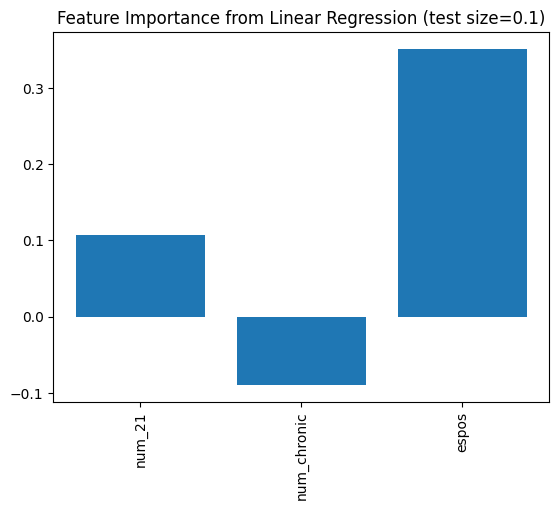

In [ ]:
plt.bar(college_bound_features, model2.coef_)
plt.title("Feature Importance from Linear Regression (test size=0.1)")
plt.xticks(rotation=90)